# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.

- Check for missing values and report the number and percentage of missing data for each column.

- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

- Generate bar plots for at least three categorical columns and discuss the frequency distributions.

- Identify outliers in at least one numerical column using boxplots.

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target.

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week.

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots.

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation.

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age     workclass  fnlwgt     education  education-num  \
8009    44  Self-emp-inc  269733     Bachelors             13   
31083   52       Private  202115       HS-grad              9   
5827    54       Private  115912  Some-college             10   
28374   53       Private  208321       HS-grad              9   
28040   61       Private  232808          10th              6   
13997   48       Private   25468       Masters             14   
17014   47   Federal-gov  402975  Some-college             10   
24420   43       Private  129853          10th              6   
4477    22     State-gov   48121  Some-college             10   
10181   43       Private  108945  Some-college             10   

           marital-status         occupation   relationship   race     sex  \
8009   Married-civ-spouse              Sales        Husband  White    Male   
31083  Married-civ-spouse      Other-service           Wife  White  Female   
5827   Married-civ-spouse       Craft-repair        Husband  White    Male   
28374  Married-civ-spouse      Other-service        Husband  Black    Male   
28040            Divorced      Other-service  Not-in-family  White    Male   
13997            Divorced    Exec-managerial  Not-in-family  White    Male   
17014  Married-civ-spouse    Exec-managerial        Husband  Black    Male   
24420       Never-married  Machine-op-inspct  Not-in-family  Black    Male   
4477   Married-civ-spouse      Other-service        Husband  White    Male   
10181       Never-married    Exec-managerial  Not-in-family  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
8009              0             0              30  United-States  <=50K  
31083             0             0              25  United-States  <=50K  
5827              0             0              40  United-States  <=50K  
28374             0          1740              40  United-States  <=50K  
28040             0             0              24  United-States  <=50K  
13997         99999             0              50  United-States   >50K  
17014             0             0              40  United-States  <=50K  
24420             0             0              40  United-States  <=50K  
4477              0             0              25  United-States  <=50K  
10181             0             0              50  United-States  <=50K

### Pentru inceput, am incarcat CSV-urile realizate la pasul 1 
#### Mai apoi, pentru fiecare in parte am setat data.sample(5) pentru a-mi rula primele 5 randuri sa fiu sigura ca e totul in regula

In [66]:
import pandas as pd

data = pd.read_csv("X_test_data.csv")

print(data.sample(5))

      age  fnlwgt  education-num  capital_net  workclass_Federal-gov  \
65     81  106765             10            0                  False   
412    28  123147             10        -1887                  False   
2350   19  307496             10            0                  False   
5542   59  168569             15            0                  False   
4547   59  121912             10            0                  False   

      workclass_Local-gov  workclass_Never-worked  workclass_Private  \
65                  False                   False              False   
412                 False                   False              False   
2350                False                   False               True   
5542                False                   False               True   
4547                False                   False               True   

      workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  \
65                     False                       False  ...   
412 

In [67]:
data = pd.read_csv("X_train_data.csv")
print(data.sample(5))

       age  fnlwgt  education-num  capital_net  workclass_Federal-gov  \
8703    29  203833             13            0                  False   
9615    35  347491             11            0                  False   
14329   33  106938              9            0                  False   
10220   56  117872             11            0                  False   
21230   28  109001              9            0                  False   

       workclass_Local-gov  workclass_Never-worked  workclass_Private  \
8703                 False                   False               True   
9615                 False                   False               True   
14329                False                   False               True   
10220                False                   False               True   
21230                False                   False               True   

       workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  \
8703                    False                       Fals

In [68]:
data = pd.read_csv("y_test_data.csv")
print(data.sample(5))

      hours-per-week
6394              44
5113              20
3305              45
3211              20
1045              40


In [69]:
data = pd.read_csv("y_train_data.csv")
print(data.sample(5))

       hours-per-week
3654               40
3499               45
25585              15
1615               40
10643              56


#### ------------------------------------------------

### Pentru inceput, cu ajutorul acestui cod, ma voi asigura ca nu am date lipsa in csv-urile incarcate
### Asa cum se observa mai jos, dupa ce am rulat, avem EMPTY DATAFRAME ceea ce inseamna ca nu avem date lipsa. Asta e un lucru bun

In [70]:
X_train_data = pd.read_csv("X_train_data.csv")

missing_values = X_train_data.isnull().sum()
missing_percent = (missing_values / len(X_train_data)) * 100

missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percent})
missing_data = missing_data[missing_data["Missing Values"] > 0]

print(missing_data)



Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


#### ------------------------------------------------
## Descriptive statistics

In [87]:
descriptive_statistics = X_train_data.describe()
print(descriptive_statistics)

                age        fnlwgt  education-num   capital_net  hours-per-week
count  26048.000000  2.604800e+04   26048.000000  26048.000000    26048.000000
mean      38.576513  1.897592e+05      10.080544    965.628609       40.388552
std       13.642904  1.052329e+05       2.575202   7254.847716       12.331139
min       17.000000  1.228500e+04       1.000000  -4356.000000        1.000000
25%       28.000000  1.179630e+05       9.000000      0.000000       40.000000
50%       37.000000  1.782635e+05      10.000000      0.000000       40.000000
75%       48.000000  2.370065e+05      12.000000      0.000000       45.000000
max       90.000000  1.484705e+06      16.000000  99999.000000       99.000000


#### ------------------------------------------------

### Ca prima vizualizare pentru date, am ales sa fac o *histograma*. 
#### Aici am inclus atat variabila tinta, hours-per-week, cat si alte 3 variabile, pe care le-am considerat importante in data-set, raportat la variabila principala

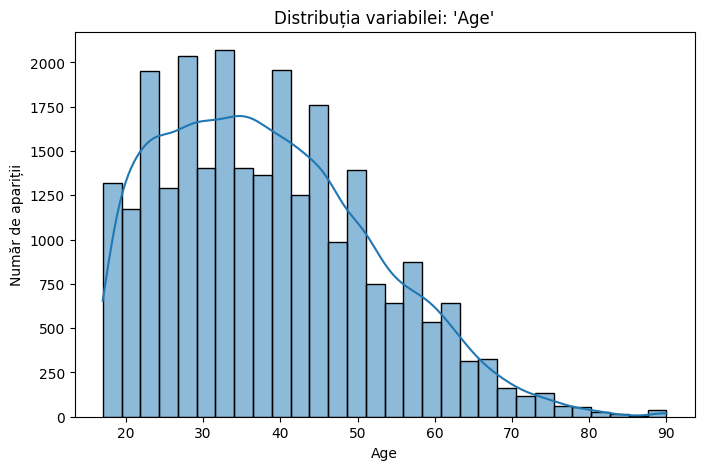

In [71]:
X_train_data = pd.read_csv("X_train_data.csv")  

plt.figure(figsize=(8, 5))
sns.histplot(X_train_data["age"], bins=30, kde=True)  
plt.title("Distribuția variabilei: 'Age'")
plt.xlabel("Age")
plt.ylabel("Număr de apariții")
plt.show()


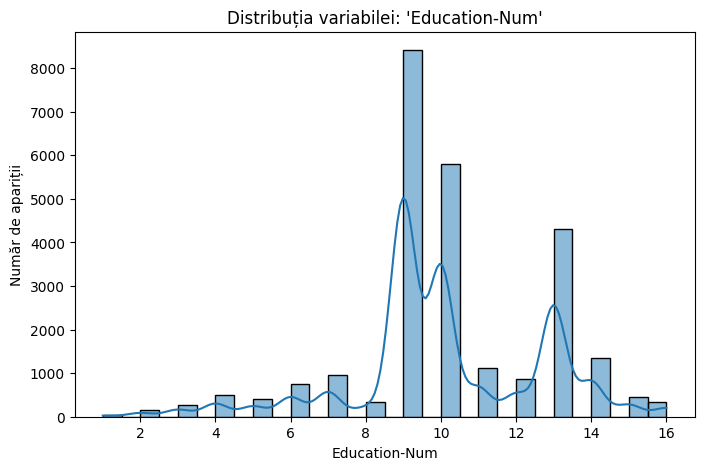

In [72]:
plt.figure(figsize=(8, 5))
sns.histplot(X_train_data["education-num"], bins=30, kde=True)  
plt.title("Distribuția variabilei: 'Education-Num'")
plt.xlabel("Education-Num")
plt.ylabel("Număr de apariții")
plt.show()


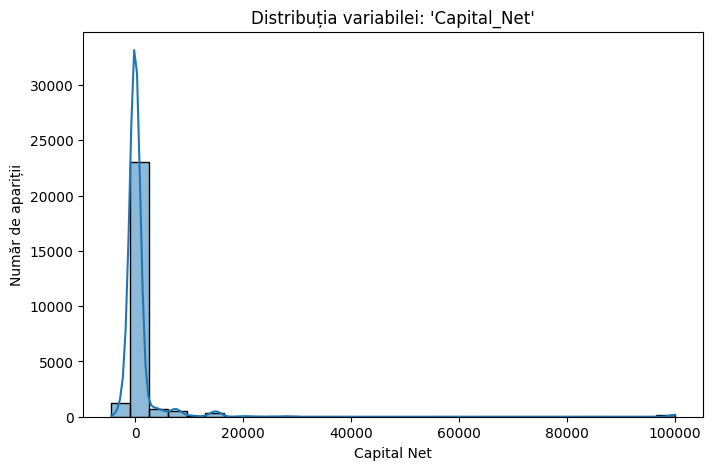

In [78]:
plt.figure(figsize=(8, 5))
sns.histplot(X_train_data["capital_net"], bins=30, kde=True)  
plt.title("Distribuția variabilei: 'Capital_Net'")
plt.xlabel("Capital Net")
plt.ylabel("Număr de apariții")
plt.show()

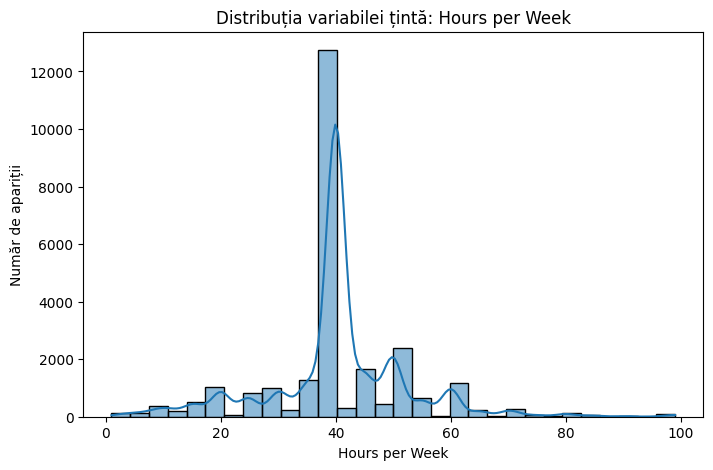

In [73]:

y_train_data = pd.read_csv("y_train_data.csv")  

plt.figure(figsize=(8, 5))
sns.histplot(y_train_data["hours-per-week"], bins=30, kde=True)
plt.title("Distribuția variabilei țintă: Hours per Week")
plt.xlabel("Hours per Week")
plt.ylabel("Număr de apariții")
plt.show()

## INTERPRETARE HISTOGRAME PENTRU VARIABILELE "AGE", "EDUCATION-NUM" SI "HOURS-PER-WEEK"

#### Pentru inceput, in primul grafic, care face referire la variabila *"age"* observam o distributie usor asimetrica, spre dreapta, ceea ce ar putea sugera faptul ca, in setul de date, au fost incluse mai multe persoane tinere, varful regasindu-se la valorile 30-40 de ani. Distributia e una normala, cu o coada spre valorile mari, cu varste cuprinse intre 60 si 80 de ani, insa acestea sunt putine.

#### Cel de-al doilea grafic face referire la variabila *"education-num"*. Acesta e putin mai ciudat, deoarece observam 2 grupuri principale de niveluri de educatie. Primul e centrat in jurul valorii 9/10 ani, iar cel de-al doilea grup e centrat in jurul valorii 13/14 ani. Primul set cuprinde cazurile cu un numar mai mic de ani de educatie - liceu, pe cand cel de-al doilea cazurile cu un numar mai mare de ani - studii universitare. Astfel, se observa o impartire clara a cazurilor in functie de nivelul de educatie

#### Hstograma variabilei tinta *"hours-per-week"* are o distributie buna, centrata pe media valorilor - 40 de ore/sapt, ceea ce inseamna ca majoritatea cazurilor au un numar mediu de ore lucrate per saptamana, un interval obisnuit de job cu norma intreaga, valoirle extreme fiind putine, insa prezente. Per total, distributia e una omogena

#### Nu in ultimul rand, variabila *Capital-net* are o distributie asimetrica, spre dreapta, cele mai multe cazuri fiind in jurul valorii 0, ceea ce inseamna un capital redus sau chiar inexistent. Posibil sa fie nevoie sa logaritmam aceasta variabila, insa ramane de vazut ce vom analiza in urmatorii pasi si daca va fi nevoie sa o folosim. 


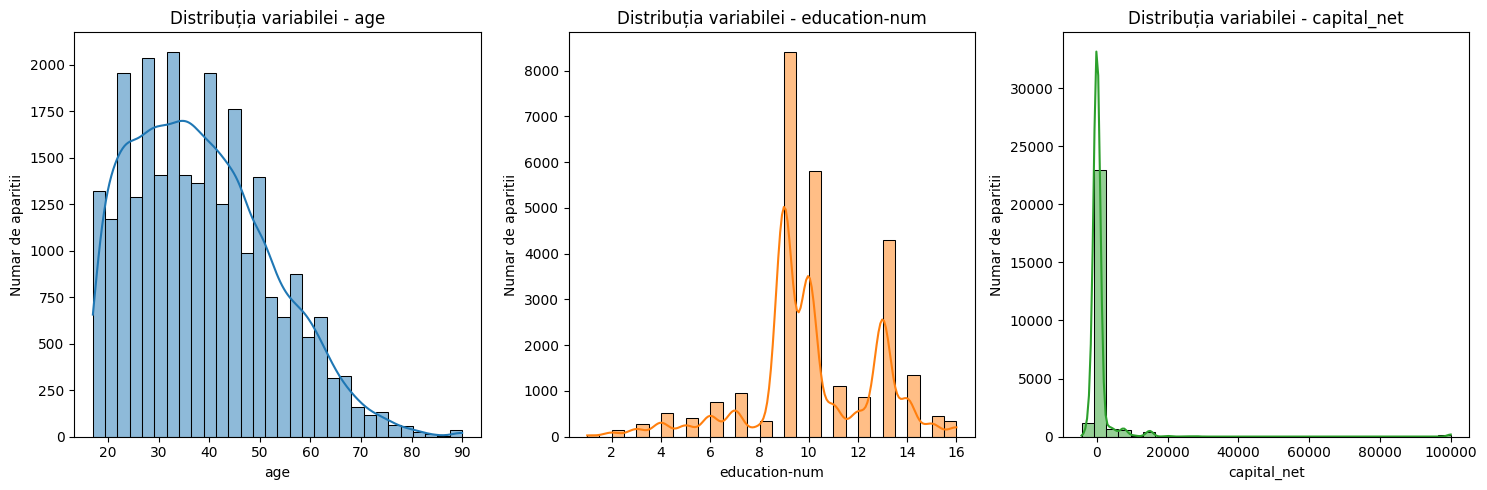

In [82]:
# aici un cod care sa le includa pe toate 3 variabile numerice

selected_numerical_cols = ["age", "education-num", "capital_net"]  
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"] 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(selected_numerical_cols):
    sns.histplot(X_train_data[col], bins=30, kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f"Distribuția variabilei - {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Numar de aparitii")
plt.tight_layout()
plt.show()


#### ------------------------------------------------
### Pentru a vedea, comparativ cu variabila tinta "hours-per-week" am facut niste corelatii, o *MATRICE de corelatii* mai exact. 
#### Ca de exemplu, variabila hours-per-week coreleaza pozitiv cu variabile precum sex_Male (0.23), income_>50K(0.22) si marital_status_Married (0.21). Acest lucru reflecta faptul ca odata ce valoarea variabilelor creste, orele lucrate pe sapt cresc. De exemplu, barbatii tind sa lucreze mai multe ore decat femeile - pe saptamana, persoanele care castiga mai mult de 50K sunt mai susceptibili sa lucreze mai multe ore pe sapt, iar persoanele casatorite tind sa lucreze mai multe ore. 
#### Pe de alta parte, avem si valori negative care arata ca pe masura ce valoarea variabilei creste, orele lucrate pe sapt scad. Exemple de variabile ar fi marital_status_Never_married sau relationship_Own_child.

In [ ]:
X_train_data["hours-per-week"] = y_train_data["hours-per-week"]

corr_with_target = X_train_data.corr()["hours-per-week"].sort_values(ascending=False)
print(corr_with_target)


hours-per-week                       1.000000
sex_Male                             0.230595
income_>50K                          0.229608
marital-status_Married-civ-spouse    0.218836
education-num                        0.145229
                                       ...   
marital-status_Widowed              -0.101634
education_11th                      -0.108238
occupation_Other-service            -0.157115
marital-status_Never-married        -0.202271
relationship_Own-child              -0.253306
Name: hours-per-week, Length: 100, dtype: float64


#### ------------------------------------------------


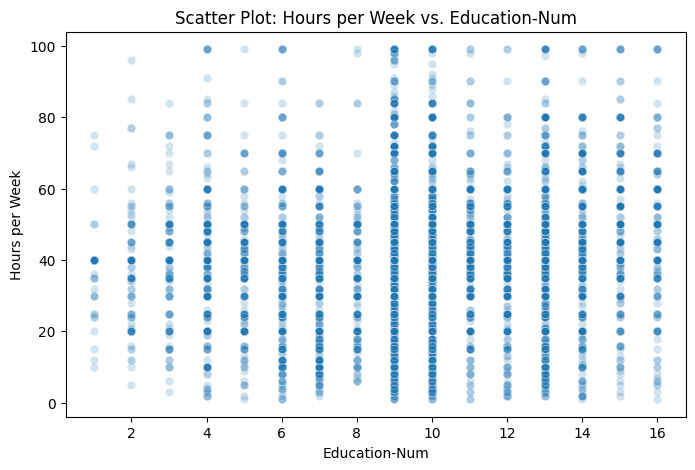

In [86]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_train_data["education-num"], y=X_train_data["hours-per-week"], alpha=0.2)
plt.title("Scatter Plot: Hours per Week vs. Education-Num")
plt.xlabel("Education-Num")
plt.ylabel("Hours per Week")
plt.show()


#### Acest SCATTER PLOT arata o distribuire uniforma a valorilor pentru education-num, ceea ce nu poate determina o relatie semnificativa intre orele lucrate pe sapt (hours-per-week) si anii de educatie (education-num)
#### Chiar daca, in viata reala am tinde sa credem ca orele de scoala ar putea influenta orele de munca pe saptamana, graficul arata contrariul. Majoritatea cazurilor sunt centrate la valoarea de 40 de ore / sapt, aspect care ar putea exemplifica faptul ca o norma intreaga de munca e de 40 de ore / sapt, independent de educatia pe care o are individul.

#### ------------------------------------------------


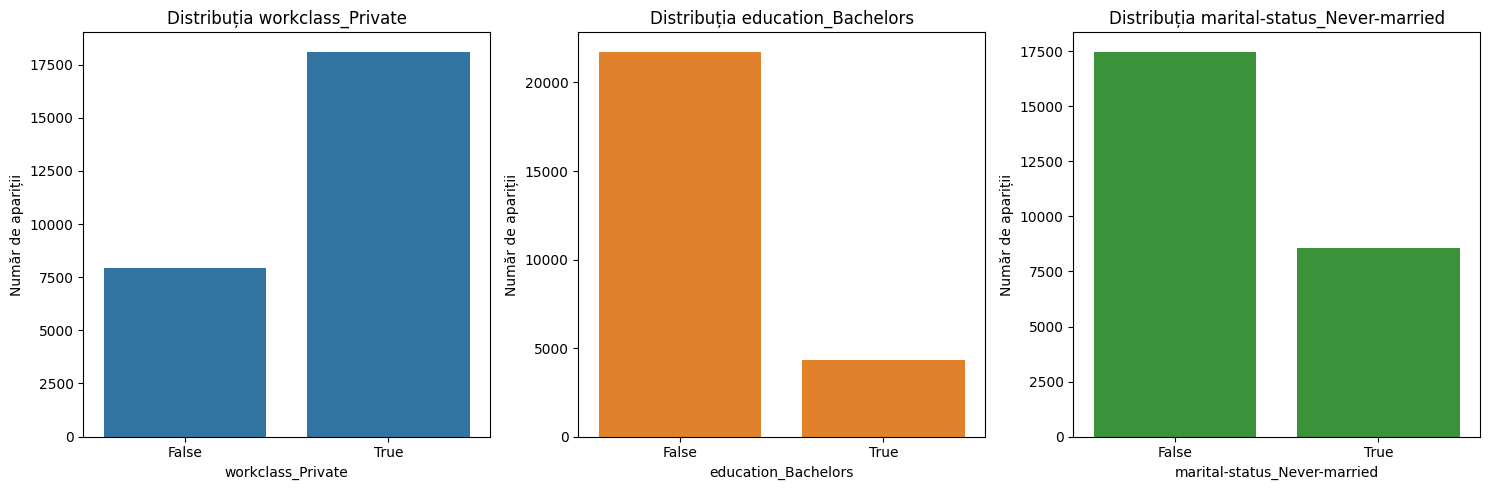

In [89]:
selected_categorical_cols = ["workclass_Private", "education_Bachelors", "marital-status_Never-married"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"] 
for i, col in enumerate(selected_categorical_cols):
    sns.countplot(x=X_train_data[col], ax=axes[i], color=colors[i])
    axes[i].set_title(f"Distribuția {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Număr de apariții")

plt.tight_layout()
plt.show()


#### Cele 3 variabile categorice, reprezentate cu ajutorul box-ploturilor fac referire la variabilele Workclass_Private, education_Bachelors si marital_status_Never_Married
#### Primul grafic, legat de *Workclass_Private* indica True - daca persoana lucreaza in sector privat sau False - cazurile care nu lucreaza in sector privat. Aici putem observa faptul ca majoritatea indivizilor lucreaza in domeniu privat.
#### Cel de-al doilea grafic reprezinta True - pentru persoanele care au doploma de licenta sau False - pentru cei care nu au diploma. Un numar foarte mic reprezinta cazurile care au diploma de licenta, valoarea indivizilor care au educatie superioara fiind si ea foarte mica.
#### Cel de-al treilea grafic face referire la variabila *Marital_Status_Never_Married* unde observam ca majoritatea cazurilor au fost casatorite, aprox jumatate fiind persoanele care nu au fost niciodata casatorite. Aici, putem corela cu variabila tinta si anume, statutul marial poate influenta comportamentul de munca, avand un impact asupra orelor lucrate per saptamana. 
#### ------------------------------------------------


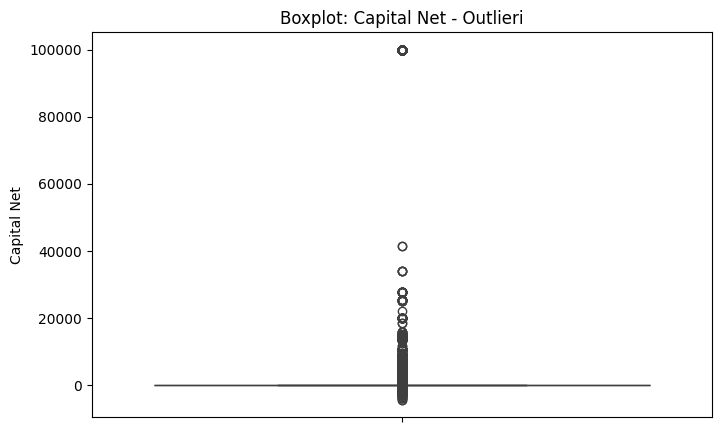

In [90]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=X_train_data["capital_net"])
plt.title("Boxplot: Capital Net - Outlieri")
plt.ylabel("Capital Net")
plt.show()


### Graficul de mai sus reprezinta box-plotul pentru Outliers din variabila numerica *capital_net*
#### Majoritatea cazurilor se gasesc in jurul valorii 0, insa avem si outlieri, care au un capital net mare - cu valori extreme, datorate probabil discrepantei dintre castiguri si avere. 
#### In box-plot se foloseste IQR, ceea ce inseamna ca se foloseste quartila 25% si 75% pentru a stabili outlierii

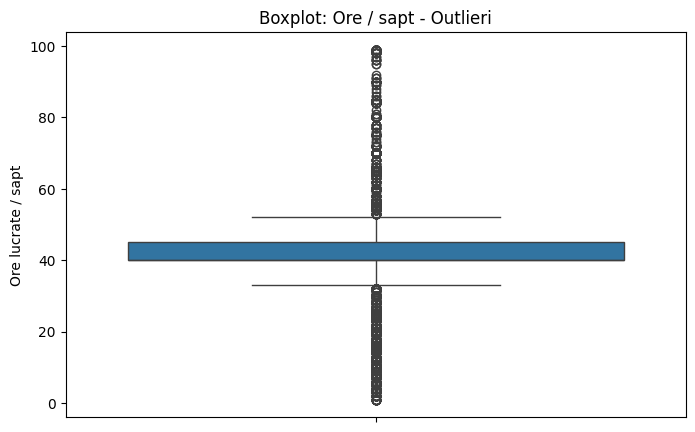

In [91]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=X_train_data["hours-per-week"])
plt.title("Boxplot: Ore / sapt - Outlieri")
plt.ylabel("Ore lucrate / sapt")
plt.show()


### Variabila tinta *hours-per-week* are o distributie buna, cu majoritatea cazurilor centrate in jurul valorii 40 de ore / sapt, care reprezinta si mediana - reflectand totodata norma standard de munca
#### Este reprezentata quartila 25% si 75%, ceea ce rezulta ca majoritatea indivizilor lucreaza intre 35 si 40 de ore/sapt, putini fiind outlierii care au valori extreme, mai putine ore - in partea de jos a mustatilor graficului, mai multe ore - in partea de sus a mustatilor. Aceste valori pot fi caracteristice persoanelor care fie au 2 joburi, fie pentru freelanceri 

#### ------------------------------------------------

## Concluzii generale

#### Per total, de-a lungul graficelor este vizibil ca majoritatea cazurilor lucreaza 40 de ore / sapt, ore caracteristice unui job full-time obisnuit
#### Varsta indivizilor intre 25 si 60 de ani reprezinta o distributie spre dreapta (skewnes), ceea ce se aplica si in viata reala, iar faptul ca educatia are 2 grupe majore in care a impartit setul de date este la fel, ceea ce s-ar putea aplica in viata reala.
#### Distrubutia care, desi a fost asimetrica, nu are atat de mare impact asupra realitatii, reprezentand numarul mic de indivizi care au capital-net mare
#### Outlierii de la variabila hours-per-week si capital-net sunt cazuri aparte, care fie au joburi extra, fie proportia castig-capital nu e corecta. In cazul capitalului, posibil o logaritmare ar fi fost utila, in viitoarele cercetari pentru a intelege mai bine ce se intampla.